# Adoption is the Best Option!

Numerous amounts of pets lose their homes or are rescued every year. Many of them face a grim reality: get adopted or get put down. 

The links between pet adoption speed and the animals' traits are relatively unexplored. A look at detailed data on pets by Adoption Speed should reveal some clear messages: Healthy pets are adopted faster, and; adoption fees should retard the adoption speed. Those claims might seem obvious, but there's evidence that many people looking to adopt pets can look past that. 

So what exactly makes a pet "adoptable" and how do their qualities affect their adoption speed?

To observe this we used data from a Malaysian adoption website [petfinder.my](https://www.petfinder.my/). This website allows rescuers to post dogs and cats online. The animals have a profile and this is tabulated in the dataset we used.

### Loading Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns; #sns.set()
import matplotlib.pyplot as plt 

%matplotlib inline

## Loading Data and Feature Engineering

#### Data Fields

* PetID: Unique hash ID of pet profile

* AdoptionSpeed: Categorical speed of adoption, ranging from levels 1 to 4

    * 0 - Pet was adopted on the same day as it was listed.

    * 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.

    * 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.

    * 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.

    * 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

* Type: Type of animal (1 = Dog, 2 = Cat)

* Name: Name of pet (Empty if not named)

* Age: Age of pet when listed, in months

* Breed1: Primary breed of the pet (Refer to BreedLabels dictionary)

* Breed2: Secondary breed of pet, if the pet is of mixed breed (Refer to BreedLabels dictionary)

* Gender: Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

* Color1: Color 1 of pet (Refer to ColorLabels dictionary)

* Color2: Color 2 of pet (Refer to ColorLabels dictionary)

* Color3: Color 3 of pet (Refer to ColorLabels dictionary)

* MaturitySize: Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

* FurLength: Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

* Vaccinated: Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

* Dewormed: Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

* Sterilized: Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

* Health: Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

* Quantity: Number of pets represented in profile

* Fee: Adoption fee (0 = Free)

* State: State location in Malaysia (Refer to StateLabels dictionary)

* RescuerID: Unique hash ID of rescuer

* VideoAmt: Total uploaded videos for this pet

* PhotoAmt: Total uploaded photos for this pet

* Description: Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

This dataset has a lot of information. Unfortunately, most of the data is categorical (Breed, Color, Name, etc.). Still, there is a lot of potential for this dataset. First, let's load it in.

In [2]:
pet_data = pd.read_csv("data/pet_data.csv")

We want to get rid of any NULL values to have a clean dataset.

In [3]:
# Cleaning 
pet_data.Description.fillna('', inplace = True)

## EDA

Separating dogs and cats in order to look closely at the specific characteristics of each. Dogs == 1 & Cats == 2

In [4]:
dog = pet_data[pet_data.Type == 1]
cat = pet_data[pet_data.Type == 2]

Average dog Adoption Speed: 2.615100836202656
Average cat Adoption Speed: 2.3995044454161203


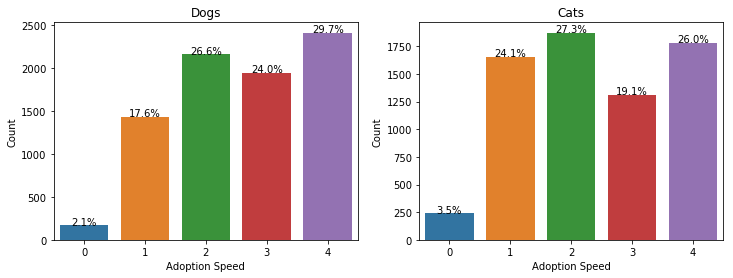

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

total = float(len(dog))
ax[0]= sns.countplot(x="AdoptionSpeed", data=dog, ax=ax[0])
ax[0].set(xlabel='Adoption Speed', ylabel='Count')
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/total),
             ha="center") 
ax[0].set_title("Dogs")


total = float(len(cat))
ax[1] = sns.countplot(x="AdoptionSpeed", data=cat, ax=ax[1]) 
ax[1].set(xlabel='Adoption Speed', ylabel='Count')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/total),
             ha="center") 
ax[1].set_title("Cats");

print("Average dog Adoption Speed:",dog.loc[:,"AdoptionSpeed"].mean())
print("Average cat Adoption Speed:",cat.loc[:,"AdoptionSpeed"].mean())

The mean adoption speed of cats seems to be slightly faster. The graphs show us that some pets were adopted immediately (Adoption Speed == 0), but it seems to be a vast minority. Also, there seems to be a bit of a linear relationship between cats and dogs. 

Are there any visible trends in adoption speeds according to gender?

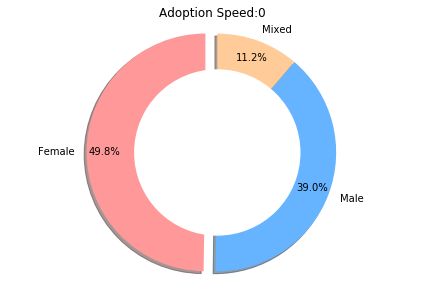

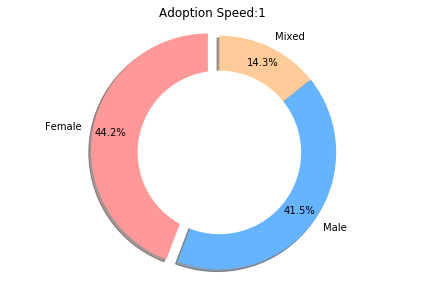

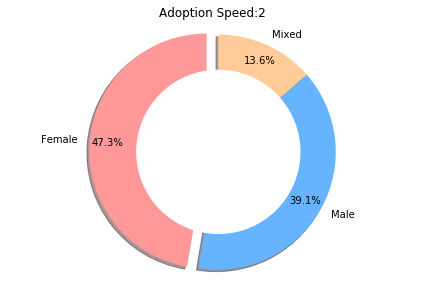

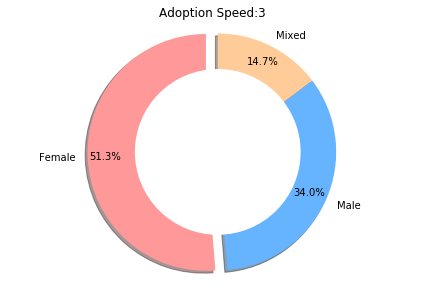

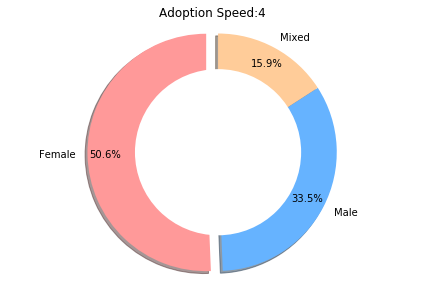

In [6]:
colors = ['#ff9999','#66b3ff','#ffcc99']
explode = (0.1, 0,0)
labels = ['Female','Male','Mixed']

#Pie chart
sex = pet_data[pet_data["AdoptionSpeed"]==0]["Gender"].value_counts()
sizes = sex
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.gca().set_title("Adoption Speed:0")

fig.savefig('zero.png', dpi=fig.dpi)

plt.show()

#Pie chart
sex = pet_data[pet_data["AdoptionSpeed"]==1]["Gender"].value_counts()
sizes = sex
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,shadow=True, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.gca().set_title("Adoption Speed:1")

fig.savefig('one.png', dpi=fig.dpi)
plt.show()

#Pie chart
sex = pet_data[pet_data["AdoptionSpeed"]==2]["Gender"].value_counts()
sizes = sex
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.gca().set_title("Adoption Speed:2")

fig.savefig('two.png', dpi=fig.dpi)
plt.show()

#Pie chart
sex = pet_data[pet_data["AdoptionSpeed"]==3]["Gender"].value_counts()
sizes = sex
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,shadow=True, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.gca().set_title("Adoption Speed:3")

fig.savefig('three.png', dpi=fig.dpi)
plt.show()

#Pie chart
sex = pet_data[pet_data["AdoptionSpeed"]==4]["Gender"].value_counts()
sizes = sex
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True,  pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.gca().set_title("Adoption Speed:4")

fig.savefig('four.png', dpi=fig.dpi)
plt.show()


There is a trend here that more only female animals are put up for adoption compared to just males or mixed. From the looks of the pie charts, the proportions of gender do not seem to vary by the adoption speed.

In [7]:
from wordcloud import WordCloud
from PIL import Image

fig = plt.subplots(figsize = (12, 12))

text_dog = ' '.join(pet_data[pet_data["Type"]==1]['Description'].fillna('').values)

dog_mask = np.array(Image.open('data/dog-cartoon1.png'))

wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask,
               contour_width=3, contour_color='gray')

# generate word cloud
wc.generate(text_dog)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure();

ModuleNotFoundError: No module named 'wordcloud'

Make a word cloud of the most common phrases that appear in the dog descriptions and mask it into the shape of a dog. It's more fun than simply creating a list of the most popular words.

In [8]:
from wordcloud import WordCloud
from PIL import Image

fig = plt.subplots(figsize = (12, 12))

text_cat = ' '.join(pet_data[pet_data["Type"]==2]['Description'].fillna('').values)
cat_mask = np.array(Image.open('data/cat2.png'))

wc = WordCloud(background_color="white", max_words=2000, mask=cat_mask,
               contour_width=3, contour_color='gray')

# generate word cloud
wc.generate(text_cat)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure();

ModuleNotFoundError: No module named 'wordcloud'

Let's do the same with cats. Isn't this fun to look at?

How do fees play a role in the dataset?

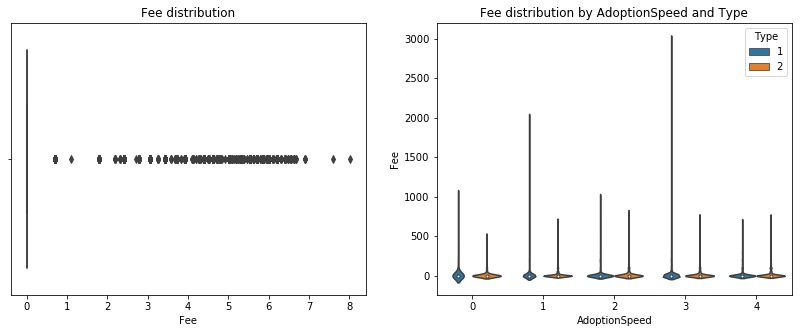

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(np.log(pet_data['Fee']+1))
plt.gca().set_title("Fee distribution")
plt.subplot(1,2,2)
sns.violinplot(x="AdoptionSpeed",y="Fee",hue="Type",data=pet_data)
plt.gca().set_title("Fee distribution by AdoptionSpeed and Type")
plt.show();

The first chart has undergone a log transform to get rid of outliers. It shows that most animals do not have a fee associated with their adoption.

The second chart shows that the range of fees for dogs is much higher than cats for most of the Adoption Fees. However, the majority of fees are still zero.

Does health play an important role in adoption speed?

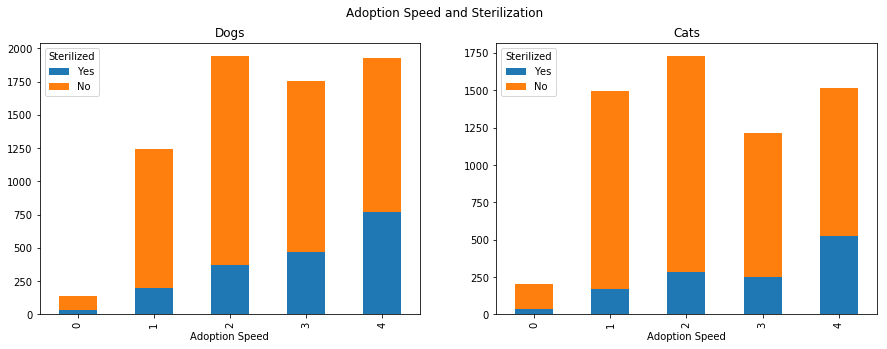

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

dog = dog[dog.Sterilized != 3]
df = dog.groupby(['AdoptionSpeed', 'Sterilized'])['AdoptionSpeed'].count().unstack('Sterilized').fillna(0)
df.plot(kind='bar', stacked=True, title="Dogs", ax=ax[0])

cat = cat[cat.Sterilized != 3]
df2 = cat.groupby(['AdoptionSpeed', 'Sterilized'])['AdoptionSpeed'].count().unstack('Sterilized').fillna(0)
df2.plot(kind='bar', stacked=True, title="Cats", ax=ax[1])

fig.suptitle("Adoption Speed and Sterilization")
ax[0].set_xlabel("Adoption Speed")
ax[1].set_xlabel("Adoption Speed")
ax[0].legend(["Yes", "No"], title="Sterilized")
ax[1].legend(["Yes", "No"], title="Sterilized");

What's interesting to see is that the majority of animals adopted are not sterilized. Also, the higher the proportion of sterilized animals, the higher the adoption speed. This seems to contradict my belief that healthier animals would be adopted faster.

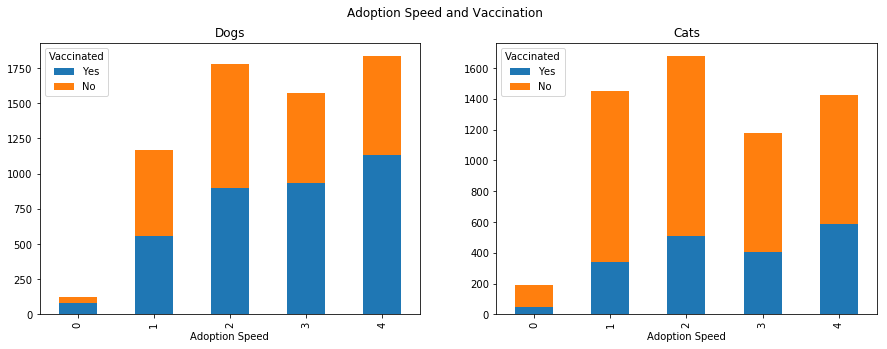

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

dog = dog[dog.Vaccinated != 3]
df = dog.groupby(['AdoptionSpeed', 'Vaccinated'])['AdoptionSpeed'].count().unstack('Vaccinated').fillna(0)
df.plot(kind='bar', stacked=True, title="Dogs", ax=ax[0])

cat = cat[cat.Vaccinated != 3]
df2 = cat.groupby(['AdoptionSpeed', 'Vaccinated'])['AdoptionSpeed'].count().unstack('Vaccinated').fillna(0)
df2.plot(kind='bar', stacked=True, title="Cats", ax=ax[1])

fig.suptitle("Adoption Speed and Vaccination")
ax[0].set_xlabel("Adoption Speed")
ax[1].set_xlabel("Adoption Speed")
ax[0].legend(["Yes", "No"], title="Vaccinated")
ax[1].legend(["Yes", "No"], title="Vaccinated");

From looking at the graphs, there seems to be a greater percentage of dogs vaccinated vs. cats.

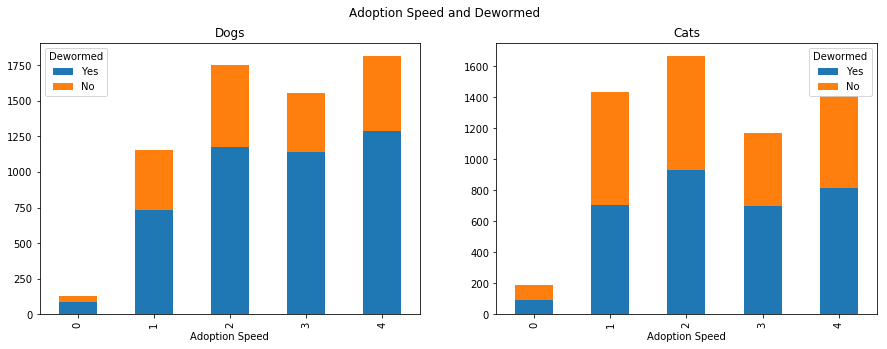

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
dog = dog[dog.Dewormed != 3]
df = dog.groupby(['AdoptionSpeed', 'Dewormed'])['AdoptionSpeed'].count().unstack('Dewormed').fillna(0)
df.plot(kind='bar', stacked=True, title="Dogs", ax=ax[0])

cat = cat[cat.Dewormed != 3]
df2 = cat.groupby(['AdoptionSpeed', 'Dewormed'])['AdoptionSpeed'].count().unstack('Dewormed').fillna(0)
df2.plot(kind='bar', stacked=True, title="Cats", ax=ax[1])

fig.suptitle("Adoption Speed and Dewormed")
ax[0].set_xlabel("Adoption Speed")
ax[1].set_xlabel("Adoption Speed")
ax[0].legend(["Yes", "No"], title="Dewormed")
ax[1].legend(["Yes", "No"], title="Dewormed");

Again there seems to be a higher proportion of dogs that are dewormed than cats.

The six graphs above do not seem to indicate any trends between health and adoption speed for either cats or dogs. It seems as if other variables are much more important.

Text(0.5, 1.0, 'Most Popular Pet Breeds')

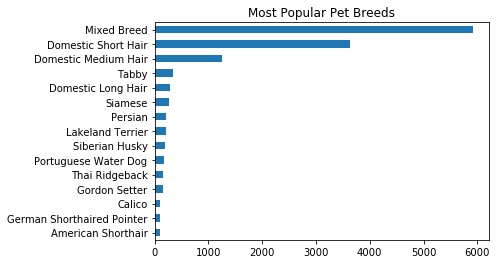

In [13]:
breed_dict = pd.read_csv("data/breed_labels.csv")
breed_dict.loc[307] = [1,2,'Mixed Breed']
breed_dict = dict(breed_dict.iloc[:,2])

pet_data['Breed1'].value_counts().sort_values().iloc[-15:].rename(breed_dict).plot(kind = 'barh');
plt.title('Most Popular Pet Breeds')

The most common pets up for adoption seem to be Mixed Breeds, Domestic Short Hair, and Domestic Medium Hair. Most likely, they are mutts that were found on the street.

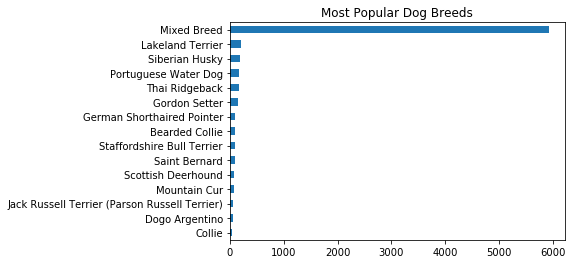

In [14]:
dog_df = pet_data[pet_data.Type == 1]
dog_df = dog_df.drop('Type',axis= 1)
dog_df['Breed1'].value_counts().sort_values().iloc[-15:].rename(breed_dict).plot(kind = 'barh');
plt.title('Most Popular Dog Breeds');

Again, the number of mutts up for adoption outnumber any other type of dog.

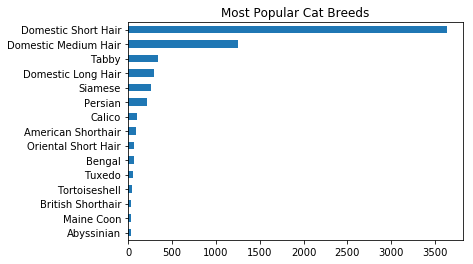

In [15]:
cat_df = pet_data[pet_data.Type == 2]
cat_df = cat_df.drop('Type',axis= 1)
cat_df['Breed1'].value_counts().sort_values().iloc[-15:].rename(breed_dict).plot(kind = 'barh');
plt.title('Most Popular Cat Breeds');

The same trend occurs with cats. Mixed Breeds are the most common by a big margin.

Are there even any sorts of correlations in this data?

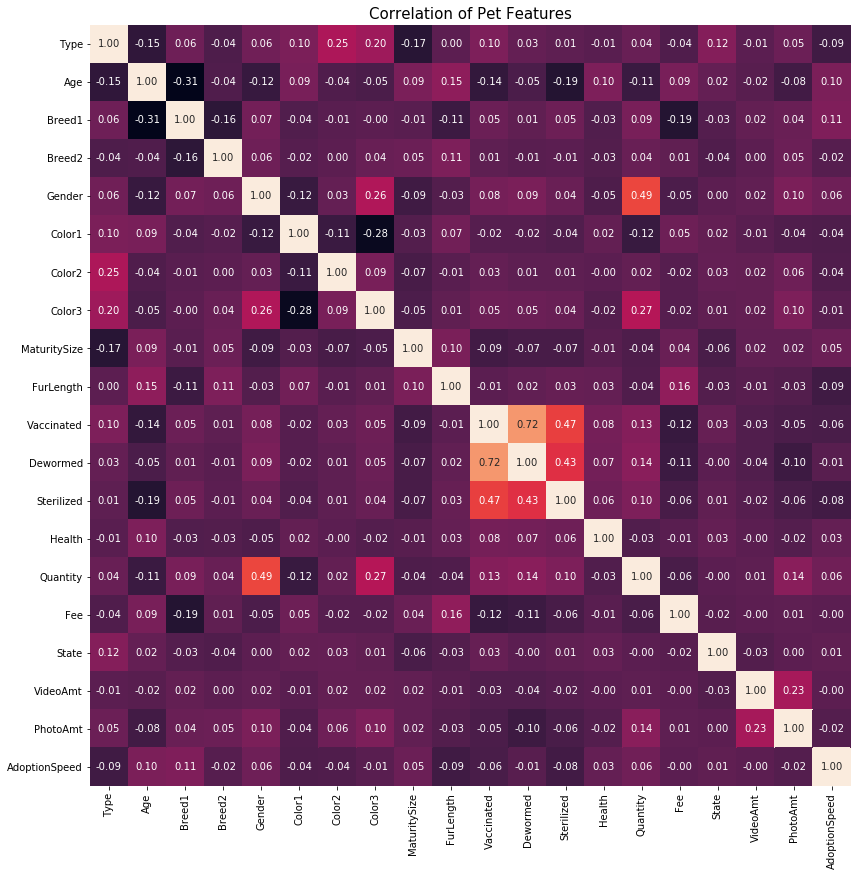

In [16]:
corr = pet_data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f')
plt.title('Correlation of Pet Features', y=1.05, size=15);

The strongest correlation we see is between dewormed and vaccinated, but that is not even high. It seems most of the data has very little relation with each other.

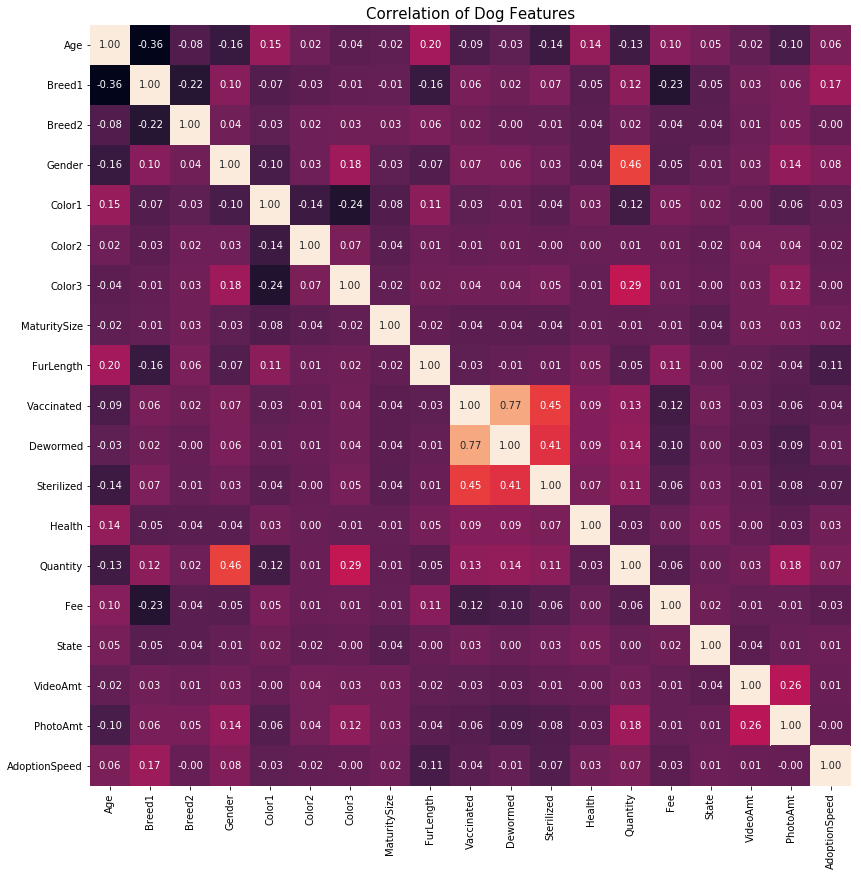

In [17]:
corr = dog_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f')
plt.title('Correlation of Dog Features', y=1.05, size=15); 

Grouping by Dogs doesn't seem to point out any trends.

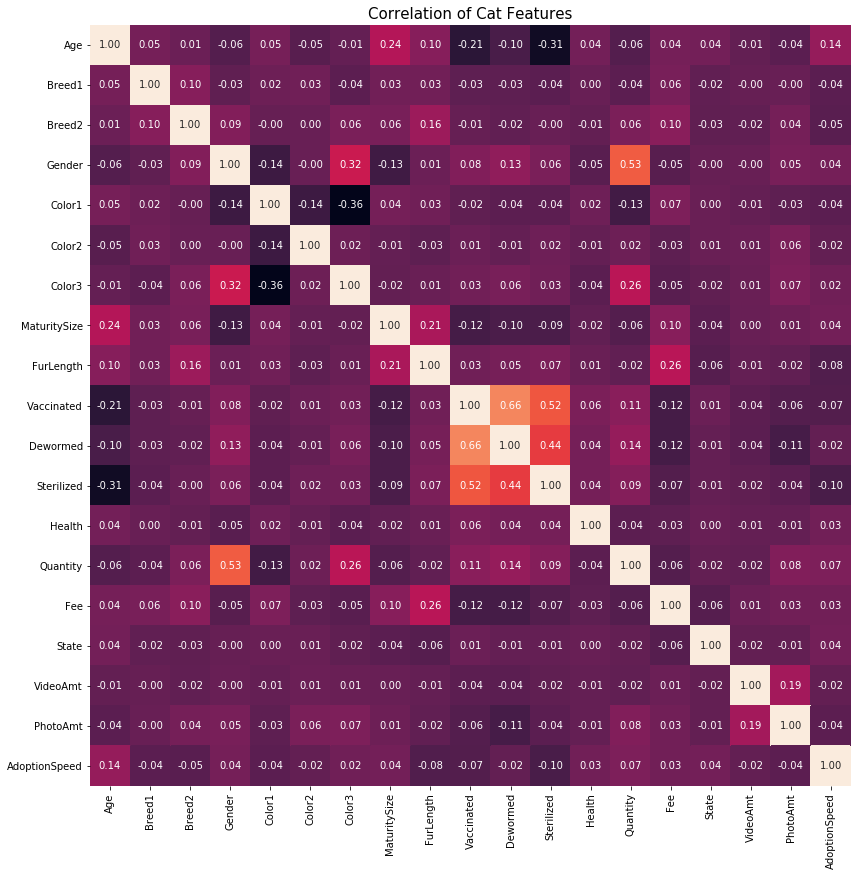

In [18]:
corr = cat_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f')
plt.title('Correlation of Cat Features', y=1.05, size=15);

Grouping by cats doesn't help us much as well.

## Vader Sentiment Analysis

So far we have not found any good trends or indications. Luckily, the descriptions have a bunch of information that we can analyze. Let's look into it. 

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

In [20]:
def get_vader_sentiment(pet_data):
    vader_df = pet_data[['PetID', 'Description']].copy()

    for index, sentence in enumerate(pet_data.Description):
        ss = sid.polarity_scores(sentence)
        vader_df.loc[index, 'compound'] = ss.get('compound')
        vader_df.loc[index, 'neg'] = ss.get('neg')
        vader_df.loc[index, 'neu'] = ss.get('neu')
        vader_df.loc[index, 'pos'] = ss.get('pos')
        
    return vader_df

In [21]:
files = os.listdir('data')

if 'vader_nlp_data.csv' in files:
    vnlp_df = pd.read_csv('data/vader_nlp_data.csv')
    vnlp_df.Description.fillna('', inplace = True)
else:
    vnlp_df = get_vader_sentiment(pet_data)
    vnlp_df.to_csv("data/vader_nlp_data.csv", index = False)

vnlp_df.head(20)

,PetID,Description,compound,neg,neu,pos
0,86e1089a3,Nibble is a 3+ month old ball of cuteness. He ...,0.9552,0.000,0.745,0.255
1,6296e909a,I just found it alone yesterday near my apartm...,0.1280,0.149,0.723,0.129
2,3422e4906,Their pregnant mother was dumped by her irresp...,0.7650,0.095,0.706,0.200
3,5842f1ff5,"Good guard dog, very alert, active, obedience ...",0.9538,0.000,0.483,0.517
4,850a43f90,This handsome yet cute boy is up for adoption....,0.9880,0.000,0.635,0.365
5,d24c30b4b,This is a stray kitten that came to my house. ...,0.0000,0.000,1.000,0.000
6,1caa6fcdb,anyone within the area of ipoh or taiping who ...,0.9116,0.000,0.814,0.186
7,97aa9eeac,Siu Pak just give birth on 13/6/10 to 6puppies...,0.4588,0.000,0.818,0.182
8,c06d167ca,"healthy and active, feisty kitten found in nei...",0.5327,0.113,0.576,0.311
9,7a0942d61,"Very manja and gentle stray cat found, we woul...",0.8916,0.000,0.751,0.249


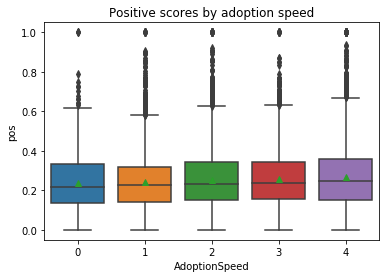

In [22]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = vnlp_df['pos'], showmeans = True)
plt.title('Positive scores by adoption speed');

Text(0.5, 1.0, 'Negative scores by adoption speed')

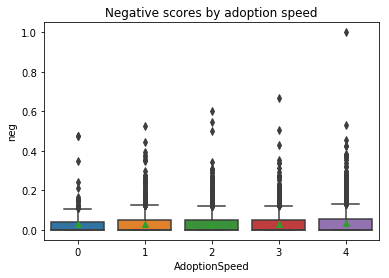

In [23]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = vnlp_df['neg'], showmeans = True)
plt.title('Negative scores by adoption speed')

Text(0.5, 1.0, 'Compound scores by Adoption Speed')

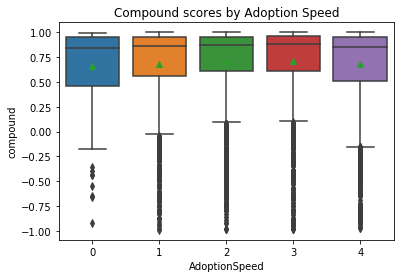

In [24]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = vnlp_df['compound'], showmeans = True)
plt.title('Compound scores by Adoption Speed')

Text(0.5, 1.0, 'Neutral Scores by Adoption Speed')

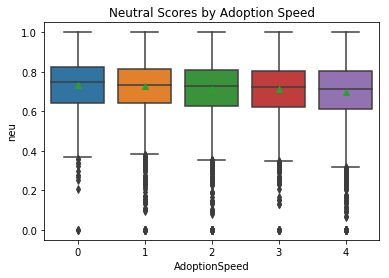

In [25]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = vnlp_df['neu'], showmeans = True)
plt.title('Neutral Scores by Adoption Speed')

## Polarity

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string

In [27]:
punct_regex = r'[^\w\s\d]'
num_regex = r'\d+'

polarity_df = vnlp_df.copy()

# Replace numbers and punctuation with spaces
polarity_df['nopunc'] = polarity_df.Description.str.replace(punct_regex, ' ')
polarity_df['nopunc'] = polarity_df.nopunc.str.replace(num_regex, ' ')

In [28]:
polarity_df['nopunc'].head()

0    Nibble is a    month old ball of cuteness  He ...
1    I just found it alone yesterday near my apartm...
2    Their pregnant mother was dumped by her irresp...
3    Good guard dog  very alert  active  obedience ...
4    This handsome yet cute boy is up for adoption ...
Name: nopunc, dtype: object

In [29]:
tidy_strings = (
    polarity_df['nopunc']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={'level_1': 'num', 0: 'word'})
)

In [30]:
sent = pd.read_csv('data/vader_lexicon.txt', sep='\t',
                   usecols=[0, 1], header=None, names=['token', 'polarity'],
                   index_col='token')

In [31]:
polarity_df['polarity'] = (
    tidy_strings
    .merge(sent, how='left', left_on='word', right_index=True)
    .reset_index()
    .loc[:, ['index', 'polarity']]
    .groupby('index')
    .sum()
    .fillna(0)
)

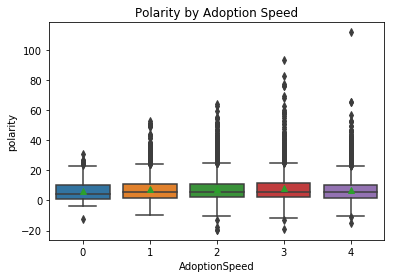

In [32]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = polarity_df['polarity'], showmeans = True)
plt.title('Polarity by Adoption Speed');

In [33]:
print('Most negative descriptions:')
for t in polarity_df.sort_values('polarity').head()['Description']:
    print('\n  ', t)

Most negative descriptions:

   Please give local dogs a home Actually they are 4 dogs! There are mother n son one more mother n daughter. They are poor doggies! The bad stall complaint there stay here n disturb their business! Suddenly these poor dogs son n daughter missing! Now leave these 2 mother dogs! This mother dogs actually can live happy with their son n daughter! Too bad human being make them live alone! Human make their family broken! These both mothers also got bad history! They also dump by their owner! They also alaways bully n abuse by human! Both of mother dogs though that can live together be best friend! Too bad their dream can not go thru! Someone warning want they die! I get this news not choice i bring them to the vet! Now they are safe! Keep in the vet make me costly a lot hope! you can open your heart to bring them home! Pls give them a chance! They are spayed! Share pls !

   Please give local dogs a home Actually they are 4 dogs! There are mother n son one more

In [34]:
print('Most positive descriptions:')
for t in polarity_df.sort_values('polarity', ascending=False).head(1)['Description']:
    print('\n  ', t)

Most positive descriptions:

   Gabby is a beautiful sleek black puppy, estimated to be at 3 months old when she turned up. That was in March . Gabby is a lovely quiet dog that hardly barks. She loves to sit and watch us when we are gardening, or sit with us when we are at ease at the porch area. Our friends who visited us, remarked what a gentle soul Gabby is. The children had no problems playing with her as Gabby is not rough. We have recently had a BBQ party & we've received encouraging remarks that Gabby does not paw, bite or disturb any of the guests when they eat or drink. Gabby was lured to our neighborhood by an irresponsible family who was unable to care for her. We gave our home as Gabby's shelter, in order for Gabby to be safe from traffic, pedestrian abuse and harsh outdoor weather. This beautiful puppy is growing up in our compound and is turning out to be a gentle dog who loves long walks, tummy rubs, sitting with us during evenings, and lots of loving attention. We would

Tokenize the descriptions, make them all lowercase, remove stopwords, perform stemming and plot frequency. 

In [35]:
nltk.download('punkt')
tokens = []
for sentence in polarity_df['nopunc']:
    tokens.append(word_tokenize(sentence))

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Turn list of lists into one list of all words
all_tokens = []
for i in tokens:
    for word in i:
        all_tokens.append(word)

In [37]:
all_tokens = [word.lower() for word in all_tokens]

In [38]:
nltk.download('stopwords')
clean_tokens = []
stop_words = set(stopwords.words('english')) 

for word in all_tokens:
    if word not in list(stop_words):
        clean_tokens.append(word)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
text_stem = []

for token in clean_tokens:
    text_stem.append(stemmer.stem(token))

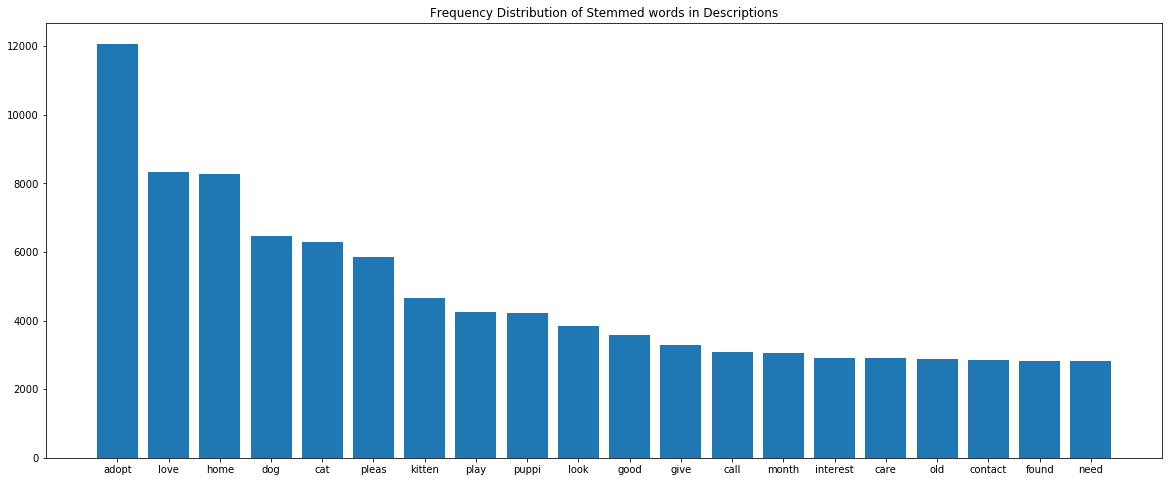

In [40]:
# Stemmed distribution
fdist = nltk.FreqDist(text_stem)
x, y = zip(*fdist.most_common(n=20)) 
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.title("Frequency Distribution of Stemmed words in Descriptions")
plt.xticks(range(len(x)), x);

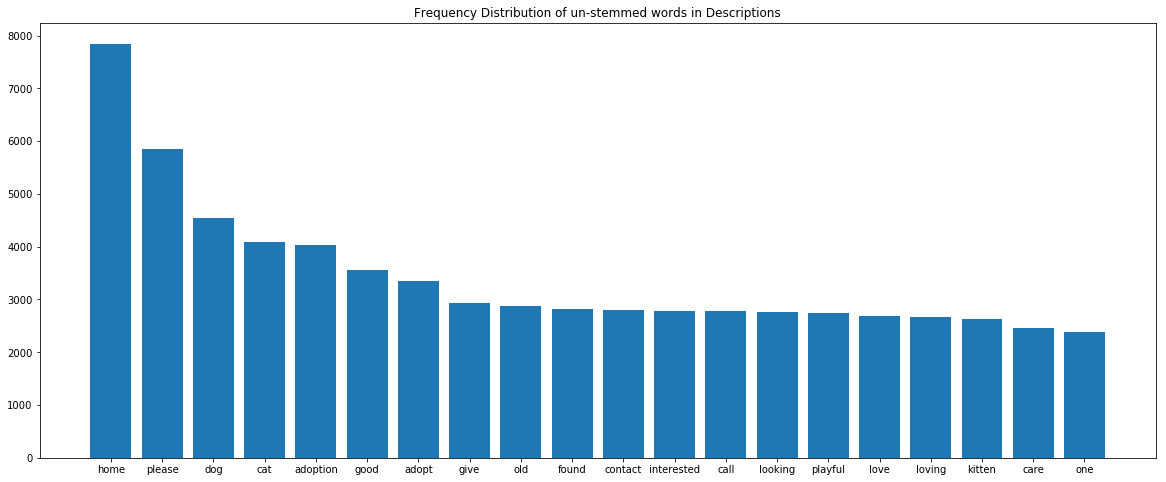

In [41]:
# Non-stemmed distribution
fdist = nltk.FreqDist(clean_tokens)
x, y = zip(*fdist.most_common(n=20)) # Unzip the tuples into lists
plt.figure(figsize=(20,8))
plt.bar(range(len(x)), y)
plt.title("Frequency Distribution of un-stemmed words in Descriptions")
plt.xticks(range(len(x)), x);

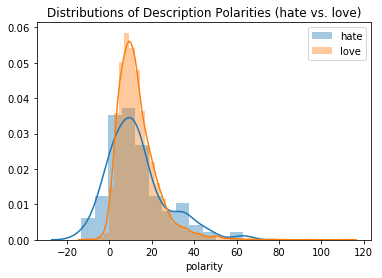

In [42]:
sns.distplot(polarity_df[polarity_df['Description'].str.lower().str.contains("hate")]['polarity'],
             label = 'hate')
sns.distplot(polarity_df[polarity_df['Description'].str.lower().str.contains("love")]['polarity'],label = 'love')
plt.title('Distributions of Description Polarities (hate vs. love)')
plt.legend();

Add columns of description length and regularized polarity, found by dividing polarity values found above by the square root of description length. Reveals new most negative/positive descriptions that are not extremely long descriptions that happen to contain many positive/negative words. 

In [43]:
descriptions = []
for sentence in pet_data['Description']:
    descriptions.append(sentence.split())

In [44]:
desc_len = []
for i in range(len(descriptions)):
    desc_len.append(len(descriptions[i]))

In [45]:
polarity_df['desc_length'] = desc_len
polarity_df['reg_pol'] = polarity_df['polarity']/np.sqrt(polarity_df['desc_length'])

In [46]:
print('Most negative descriptions:')
for t in polarity_df.sort_values('reg_pol').head()['Description']:
    print('\n  ', t)

Most negative descriptions:

   Coverage area.. (Ampang/Cheras/Kepong/Selayang) To avoid poisoning death case by black hearted people..Currently stay in industrial area. Our restaurant staff was pissed off to clean their shit..

   kucing pertama yg kami selamatkan.. jatuh dlm longkang.. kami bela dari kecik n comot2 lagi.. abg Long ni jenis yg caring sal adik2 die yg len.. tp xske ade kucing yg lg besar dr die.. die hormat Papa. die suke:- becermin -guling2 -main dry food -berimaginasi die seekor kucing yg;- tegas -penyakat

   She was dumped here in the neighborhood by irresponsible owner. Was seen wandering around & was sleeping under the sun. She desperately need some T.L.C. & a place she can call home. She's also in danger since the municipal council is hunting for stray dogs to be killed. Plus, most of the residents here are animal haters. Please bring her home.

   He was abandon by the owner to die.

   Meet Baby Rosemary, one of the puppies that we intend to rescue out from th

In [47]:
print('Most positive descriptions:')
for t in polarity_df.sort_values('reg_pol', ascending=False).head()['Description']:
    print('\n  ', t)

Most positive descriptions:

   active,playful,cheerful...

   love is a healthy, loving, naughty,super cute, lively, happy and beautiful dog, ready for his new home. For serious adopters only.

   Hello People! My name is Momo, I'm a little kitty with a big people friendly heart. All of the humans I've met so far have been super kind and loving, leaving me food and treats, I love it when they stop to pet me and tickle my tummy! But I really need to find a home for a long and happy life to share with the right humans! Ideally I would love to be an indoor kitty, yay! But if you're in a quiet, off road area, I might like that too. I am fit and healthy, but need to visit the vets for my vaccinations and spaying, and I would appreciate if my new parents would take care of the adoption fees the all my future vets bills for me, the vets here only except this thing called ringit, I really don't know why, funny humans, it's a bit chewy and doesn't taste so nice, Tuna is still my favourite, Hmm

## Pet Recommendation

In [48]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

In [49]:
rec_data = pet_data.copy()
rec_data['key_words'] = (rec_data['Description']
 .str.lower()
 .str.strip()
)

# Remove Punctuation
punct_regex = r'[^\w\s]'
rec_data['key_words'] = rec_data['key_words'].str.replace(punct_regex, ' ')

# Remove Numbers
num_regex = r'\d+' 
rec_data['key_words'] = rec_data['key_words'].str.replace(num_regex, '') 

# Extract the keywords (exclude stop words)
rec_data['key_words'] = (rec_data['key_words']
                       .apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])))

# Tokenize the plots using word_tokenize  (use .apply like above)
rec_data['key_words'] = rec_data['key_words'].apply(lambda x: word_tokenize(x))

In [50]:
processed_keywords=[]
for keywords in rec_data['key_words']:
    processed_keywords.append(keywords)
dictionary = Dictionary(processed_keywords)

In [51]:
corpus = [dictionary.doc2bow(kw) for kw in processed_keywords]

In [52]:
tfidf = TfidfModel(corpus)
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [53]:
def pet_recommendation(petID, dictionary, number_of_hits = 5, top_words = 5):  
    # We will first start by getting the key words of the pet
    pet = rec_data.loc[rec_data.PetID==petID] 
    keywords = pet['key_words']

    doc=[]
    for word in keywords:
        doc.extend(word)
    
    # Convert the doc into it's equivalent bag of words
    query_doc_bow = dictionary.doc2bow(doc) 
    
    # convert the regular bag of words model to a tf-idf model where we have tuples
    # of the pet ID and its tf-idf value for the pet
    query_doc_tfidf = tfidf[query_doc_bow]
    
    # get the array of similarity values between the inputted pet and every other pet. 
    # To do this, we pass our list of tf-idf tuples to sims.
    similarity_array = sims[query_doc_tfidf] 
    # the length is the number of pets we have. 

    similarity_series = pd.Series(similarity_array.tolist(), index=rec_data.PetID.values) #Convert to a Series
    top_hits = similarity_series.sort_values(ascending=False)[1:number_of_hits+1] 
    #get the top matching results, i.e. most similar pets; 
    # start from index 1 because every pet is most similar to itself

    #print the words with the highest tf-idf values for the provided pet:
    sorted_tfidf_weights = sorted(tfidf[corpus[pet.index.values.tolist()[0]]], key=lambda w: w[1], reverse=True)
    print('Top %s words associated with this pet by tf-idf are: ' % top_words)
    for term_id, weight in sorted_tfidf_weights[:top_words]:
        print(" '%s' (tf-idf score = %.3f)" %(dictionary.get(term_id), weight))
    print("\n")
    
    # Print the top matching pets
    print("Top %s most similar pets for pet %s are:" %(number_of_hits, petID))
    top_pets=[]
    for idx, (pet,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d %s (similarity score = %.3f)" %(idx+1, pet, score))
        top_pets.append(pet)
    print("\n")
    
    # Print descriptions for top matching pets
    print("Descriptions for most similar pets are:")
    for idx, (pet,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d %s : %s" %(idx+1, pet, rec_data.loc[rec_data['PetID'] == pet, 'Description'].iloc[0]))
        top_pets.append(pet)
    return top_pets

An example of runing the pet recommendation

In [54]:
pet_recommendation('4a9793dfb', dictionary)

Top 5 words associated with this pet by tf-idf are: 
 'kittens' (tf-idf score = 0.318)
 'evident' (tf-idf score = 0.290)
 'befriended' (tf-idf score = 0.261)
 'mother' (tf-idf score = 0.256)
 'bathroom' (tf-idf score = 0.245)


Top 5 most similar pets for pet 4a9793dfb are:
1 1d41418f7 (similarity score = 0.593)
2 0499e1ea8 (similarity score = 0.432)
3 33add94a0 (similarity score = 0.328)
4 4b1f93aac (similarity score = 0.315)
5 08fb442fa (similarity score = 0.296)


Descriptions for most similar pets are:
1 1d41418f7 : Hi Pet Lovers! 2 months ago the mother we befriended gave birth to a litter of 7 cute kittens and we have been taking care of the mother and the kittens ever since in our home...in the ground floor bathroom! 6 kitties have been adopted by the new mummies and daddies Please help to look for a good home for the adorable little black one....please give him a chance :( Thank you!
2 0499e1ea8 : Stray mother's kittens
3 33add94a0 : Kittens and mother kitten up for adoption.
4

['1d41418f7',
 '0499e1ea8',
 '33add94a0',
 '4b1f93aac',
 '08fb442fa',
 '1d41418f7',
 '0499e1ea8',
 '33add94a0',
 '4b1f93aac',
 '08fb442fa']

## Cloud Natural Language API Score and Magnitude

In [55]:
from google.cloud import language_v1
from google.cloud.language_v1 import enums, types

import six
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/Eduardo/Downloads/PETFINDER-ADOPTION-97be3e2996af.json"

def analyze_sentiment_googleNLP(content):
    """
    Queries google's deepmind for sentiment score and magnitude and returns a sentiment object.
    """
    try:
        client = language_v1.LanguageServiceClient()

        if isinstance(content, six.binary_type):
            content = content.decode('utf-8')

        type_ = enums.Document.Type.PLAIN_TEXT
        document = {'type': type_, 'content': content}

        response = client.analyze_sentiment(document)
        sentiment = response.document_sentiment
        
        print('Score: {}'.format(sentiment.score))
        print('Magnitude: {}'.format(sentiment.magnitude))

# Some sentences are pure malay which google does not support, we don't give a score for those
    except Exception as e:
        
        print("Sentence incompatible: " + str(content))
        sentiment = types.Sentiment(magnitude = None, score = None)
        
    return sentiment

ModuleNotFoundError: No module named 'google.cloud'

In [56]:
def get_googleNLP_sentiment(pet_data):
    # Creating the sentiment data frame
    sentiment_df = pet_data[['PetID', 'Description']].copy()

    # For each pet description we get the respective score and magnitude
    for index, description in enumerate(sentiment_df.Description):
        sentiment_data = analyze_sentiment_googleNLP(description)
        sentiment_df.loc[index, 'magnitude'] = sentiment_data.magnitude
        sentiment_df.loc[index, 'score'] = sentiment_data.score
    
    return sentiment_df

In [57]:
files = os.listdir('data')

if 'google_nlp_data.csv' in files:
    gnlp_df = pd.read_csv('data/google_nlp_data.csv')
else:
    gnlp_df = get_googleNLP_sentiment(pet_data)
    
    # Saving file to csv as it takes a very long time to run (also possibly expensive)
    gnlp_df.to_csv("data/google_nlp_data.csv", index = False)

# Previewing the data
gnlp_df.head(20)

,PetID,magnitude,score
0,b5e7e4539,0.5,0.0
1,41e824cbe,8.3,0.2
2,0833744e6,2.9,0.3
3,fc229a9d7,1.7,0.4
4,3589a8a0d,0.9,0.9
5,bdfe6125d,0.7,0.3
6,57af29aba,1.1,0.3
7,94afcd90c,2.1,0.0
8,aa7dc1913,1.9,0.2
9,868dcd617,1.3,0.3


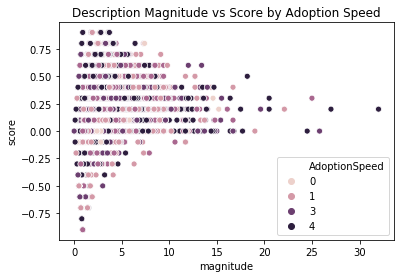

In [58]:
sns.scatterplot(x=gnlp_df.magnitude, y = gnlp_df.score, hue=pet_data.AdoptionSpeed)
plt.title('Description Magnitude vs Score by Adoption Speed');

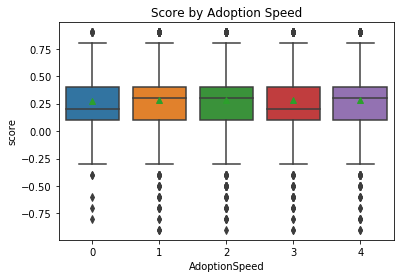

In [59]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = gnlp_df.score, showmeans = True)
plt.title('Score by Adoption Speed');

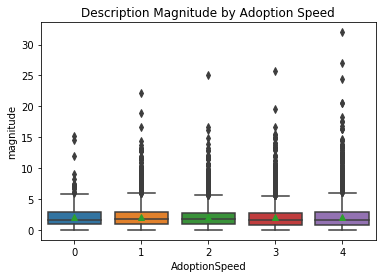

In [60]:
sns.boxplot(x = pet_data['AdoptionSpeed'], y = gnlp_df.magnitude, showmeans = True)
plt.title('Description Magnitude by Adoption Speed');

## Feature Engineering

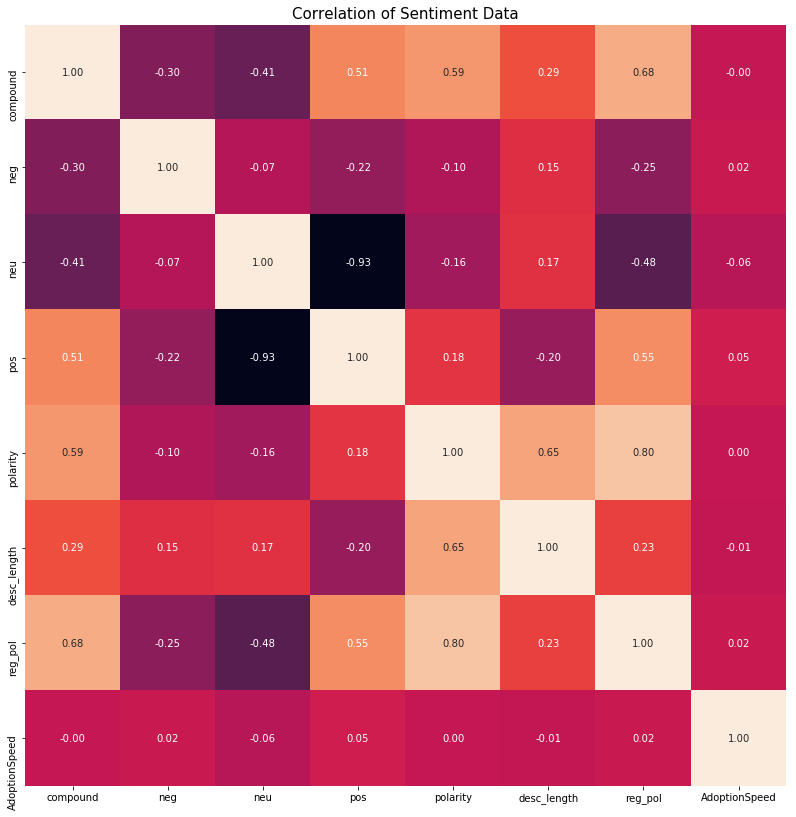

In [61]:
sentiment_df = polarity_df.copy()
sentiment_df['AdoptionSpeed'] = pet_data['AdoptionSpeed']

corr = sentiment_df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f')
plt.title('Correlation of Sentiment Data', y=1.05, size=15);

In [62]:
train_data = pd.merge(pet_data, gnlp_df, on="PetID")
train_data = pd.merge(train_data, polarity_df.drop('Description', axis = 1), on="PetID")
train_data.drop(['Name', 'PetID', 'RescuerID'], axis = 1, inplace=True)
train_data.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,magnitude,score,compound,neg,neu,pos,nopunc,polarity,desc_length,reg_pol
0,2,3,299,0,1,1,7,0,1,1,...,2.4,0.3,0.9552,0.000,0.745,0.255,Nibble is a month old ball of cuteness He ...,13.6,69,1.637248
1,2,1,265,0,1,1,2,0,2,2,...,0.7,-0.2,0.1280,0.149,0.723,0.129,I just found it alone yesterday near my apartm...,0.5,23,0.104257
2,1,1,307,0,1,2,7,0,2,2,...,3.7,0.2,0.7650,0.095,0.706,0.200,Their pregnant mother was dumped by her irresp...,4.1,69,0.493582
3,1,4,307,0,2,1,2,0,2,1,...,0.9,0.9,0.9538,0.000,0.483,0.517,Good guard dog very alert active obedience ...,8.7,25,1.740000
4,1,1,307,0,1,1,0,0,2,1,...,3.7,0.6,0.9880,0.000,0.635,0.365,This handsome yet cute boy is up for adoption ...,22.8,81,2.533333


In [63]:
train_data.columns.values

array(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'Description', 'PhotoAmt', 'AdoptionSpeed', 'magnitude', 'score',
       'compound', 'neg', 'neu', 'pos', 'nopunc', 'polarity',
       'desc_length', 'reg_pol'], dtype=object)

In [64]:
train_data.isna().sum()

Type              0
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
VideoAmt          0
Description       0
PhotoAmt          0
AdoptionSpeed     0
magnitude         0
score             0
compound          0
neg               0
neu               0
pos               0
nopunc            0
polarity         16
desc_length       0
reg_pol          16
dtype: int64

In [65]:
train_data.dropna(inplace = True)

In [66]:
X_df = train_data.drop(['Description', 'nopunc', 'AdoptionSpeed'], axis = 1)
X_df.dtypes

Type              int64
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
State             int64
VideoAmt          int64
PhotoAmt        float64
magnitude       float64
score           float64
compound        float64
neg             float64
neu             float64
pos             float64
polarity        float64
desc_length       int64
reg_pol         float64
dtype: object

In [67]:
X = X_df.values

In [68]:
Y_df = train_data.AdoptionSpeed
Y_df.dtypes

dtype('int64')

In [69]:
Y = train_data.AdoptionSpeed.values
Y

array([2, 0, 3, ..., 3, 4, 3])

In [70]:
from sklearn.model_selection import train_test_split
# Getting Training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

## Trees and Random Forest Models

In [71]:
from sklearn.tree import DecisionTreeClassifier

pet_dtree = DecisionTreeClassifier()
pet_dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
from sklearn.metrics import classification_report, accuracy_score

Y_pred = pet_dtree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        92
           1       0.29      0.29      0.29       733
           2       0.35      0.34      0.35       998
           3       0.28      0.28      0.28       811
           4       0.42      0.44      0.43       973

   micro avg       0.33      0.33      0.33      3607
   macro avg       0.28      0.28      0.28      3607
weighted avg       0.34      0.33      0.33      3607

0.33462711394510675


In [73]:
from sklearn.ensemble import RandomForestClassifier

pet_forest = RandomForestClassifier(n_estimators = 1000, random_state = 0)
pet_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
from sklearn.metrics import classification_report, accuracy_score

Y_pred = pet_forest.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Average accuracy: %f" % accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.39      0.35      0.37       733
           2       0.37      0.40      0.39       998
           3       0.45      0.24      0.32       811
           4       0.49      0.71      0.58       973

   micro avg       0.43      0.43      0.43      3607
   macro avg       0.34      0.34      0.33      3607
weighted avg       0.41      0.43      0.41      3607

Average accuracy: 0.429166


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

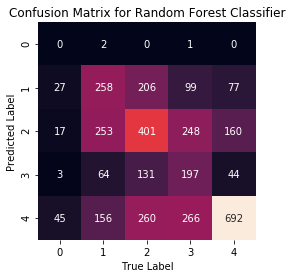

In [75]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y_test, Y_pred)

sns.heatmap(confusion_mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier')

In [76]:
X_sentiment_df = train_data[['magnitude','score','compound','neg','neu',
                             'pos','polarity','desc_length','reg_pol',]]
X_sentiment_df.dtypes

magnitude      float64
score          float64
compound       float64
neg            float64
neu            float64
pos            float64
polarity       float64
desc_length      int64
reg_pol        float64
dtype: object

In [77]:
X_sentiment = X_sentiment_df.values

In [78]:
from sklearn.model_selection import train_test_split
# Getting Training and test data
X_train_sent, X_test_sent, Y_train_sent, Y_test_sent = train_test_split(X_sentiment, Y, random_state = 0)

In [79]:
from sklearn.ensemble import RandomForestClassifier

pet_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
pet_forest.fit(X_train_sent, Y_train_sent)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
from sklearn.metrics import classification_report, accuracy_score

Y_pred_sent = pet_forest.predict(X_test_sent)
print(classification_report(Y_pred_sent, Y_test_sent))
print("Average accuracy: %f" % accuracy_score(Y_test_sent, Y_pred_sent))

              precision    recall  f1-score   support

           0       0.04      0.17      0.07        23
           1       0.19      0.24      0.21       568
           2       0.37      0.33      0.35      1122
           3       0.25      0.31      0.28       662
           4       0.41      0.32      0.36      1232

   micro avg       0.31      0.31      0.31      3607
   macro avg       0.25      0.27      0.25      3607
weighted avg       0.33      0.31      0.31      3607

Average accuracy: 0.307180


Text(0.5, 1.0, 'Confusion Matrix for Sentiment Data Only')

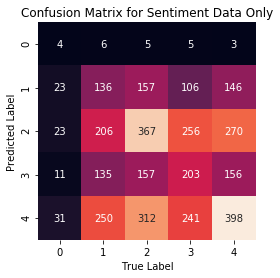

In [81]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y_test_sent, Y_pred_sent)

sns.heatmap(confusion_mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for Sentiment Data Only')

## PCA

Principal Component Analysis (PCA) allows us to extract high-dimensional information and project it onto a lower-dimensional subspace. The goal is to save the important parts and remove irrelevant information. PCA is unsupervised, meaning it can cluster data based on feature correlation without labels. 

We are using PCA here to visual data because of the large dimensionality of the data set.

In [92]:
from sklearn.decomposition import PCA
pet_pca = PCA(n_components=2)
pca_data = pet_pca.fit_transform(X_train)

After loading the information, we need to create a DataFrame of the final data.

In [93]:
principal_train_Df = pd.DataFrame(
    data = pca_data,
    columns = ['principal component 1', 'principal component 2']
)

Let's look at the explained variance ratio to see the amount of information our principal components hold after reduction to a lower-dimensional subspace.

In [94]:
print('Explained variation per principal component: {}'.format(pet_pca.explained_variance_ratio_))

Explained variation per principal component: [0.48535219 0.21905426]


Principal Component 1 holds 48.5% of the information. Principal Component 2 holds about 22%. Reducing the data dimensions means we lost about 29% of the data.

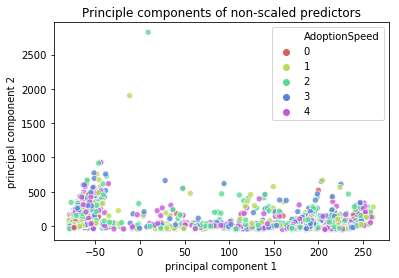

In [95]:
plt.title('Principle components of non-scaled predictors')
sns.scatterplot(
    x=principal_train_Df["principal component 1"], y=principal_train_Df["principal component 2"],
    hue = pet_data["AdoptionSpeed"],
    palette=sns.color_palette("hls", 5),
    data=principal_train_Df,
    legend="full",
    alpha=0.8
);

From the graph, it is difficult to see any clustering because of big outliers. Therefore, we need to scale the data.

In [96]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)

We should standardize the data because PCA is influenced by the scales of the data.

In [100]:
from sklearn.decomposition import PCA
pet_pca = PCA(n_components=2)
pca_data = pet_pca.fit_transform(X_train_scaled)

StandardScaler will normalize our data into a Normal distribution with mean 0 and standard deviation 1. Below we will store all the information into a DataFrame.

In [102]:
principal_train_Df = pd.DataFrame(
    data = pca_data,
    columns = ['principal component 1', 'principal component 2']
)

In [103]:
print('Explained variation per principal component: {}'.format(pet_pca.explained_variance_ratio_))

Explained variation per principal component: [0.14072043 0.09982898]


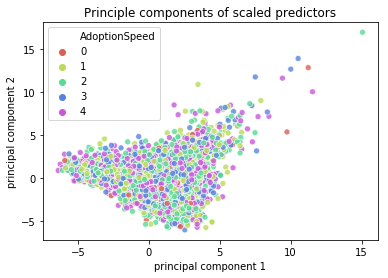

In [90]:
plt.title('Principle components of scaled predictors')
sns.scatterplot(
    x=principal_train_Df["principal component 1"], y=principal_train_Df["principal component 2"],
    hue = pet_data["AdoptionSpeed"],
    palette=sns.color_palette("hls", 5),
    data=principal_train_Df,
    legend="full",
    alpha=0.8
);

From the graph above we can see that after the data is normalized there is more visible clustering.

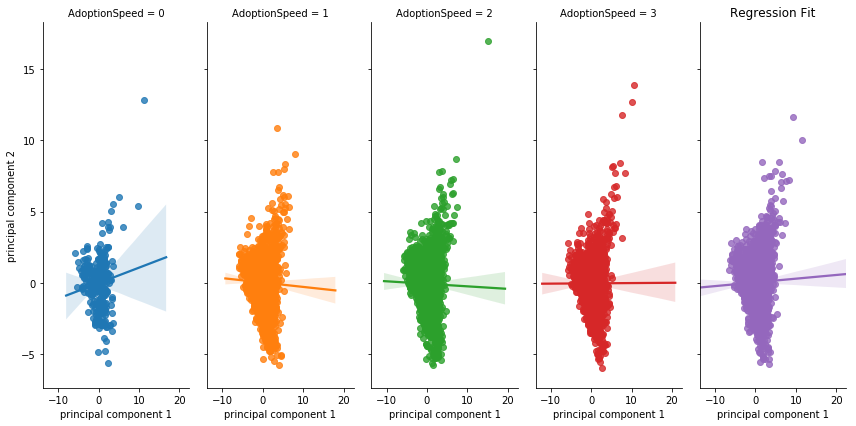

In [107]:
principal_train_Df['AdoptionSpeed'] = pet_data.AdoptionSpeed
sns.lmplot(
    x="principal component 1", 
    y="principal component 2",  
    col= 'AdoptionSpeed', 
    hue='AdoptionSpeed',
    height=6, aspect=.4, x_jitter=.1,
#     markers=["o", "x",".",",", '*'],
    data = principal_train_Df,
)
plt.title('Regression Fit');

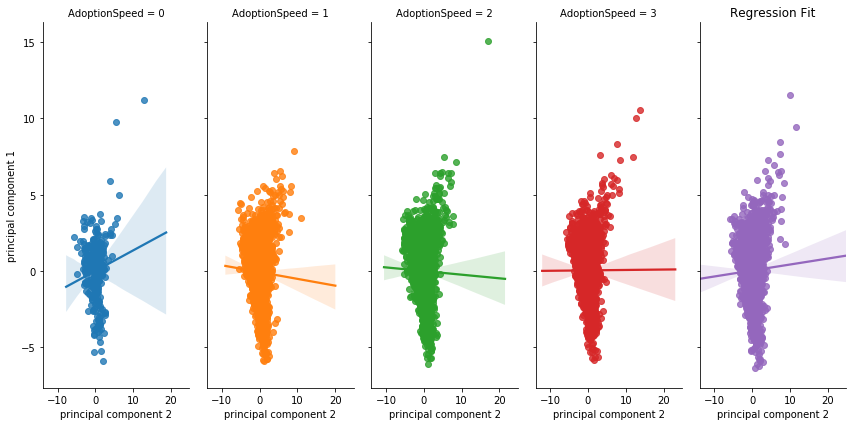

In [106]:
principal_train_Df['AdoptionSpeed'] = pet_data.AdoptionSpeed
sns.lmplot(
    x="principal component 2", 
    y="principal component 1",  
    col= 'AdoptionSpeed', 
    hue='AdoptionSpeed',
    height=6, aspect=.4, x_jitter=.1,
#     markers=["o", "x",".",",", '*'],
    data = principal_train_Df,
)
plt.title('Regression Fit');

Using linear regression to see how well the variables fit each other does not seem to work well either.

## Conclusion

After doing an extensive analysis of pet adoption speeds there does not seem to be any major correlations or relationships in the data. What we did notice is that many of our assumptions were contradicted by the data. For example, the health of the animal did not play a very important role in the data. 

Another interesting point is that normalizing the data and using log transformations were necessary to get rid of the outliers. Looking at the PCA after the data was scaled showed much clearer clustering than the regular data.

Ultimately, there does not seem to be any main predictors in how fast an animal will be adopted. Although we do not have a random guess, our guess is only a little better.

## What's Next?

An interesting topic to explore would be to look at photos and videos of the animals and come up with a cuteness index. We feel one of the biggest factors in pet adoption is how cute someone thinks the pet is. However, the challenge that comes up is how to determine what is cute and what isn't cute. After all, beauty is in the eye of the beholder.

# Instructor Comments:
Please email Professor Oh at syoh@pstat.ucsb.edu for comments and the grading of this project.